In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/home/sedroc/Bachelor/FEPCEU')

In [3]:
from enhanced_experiment import EnhancedTimeSeriesExperiment
from models.arima import Arima
from models.baseline import Baseline
from models.lgbm import LGBM
from models.neuralproph import Neuralprophet

from data.data_retriever import Dataretreiver

/home/sedroc/Bachelor/FEPCEU/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [4]:
# Define models
models = {
    #'BASELINE': Baseline(),
    'LGBM': LGBM(),
    #'ARIMA': Arima(order=[1,0,1], seasonal_order=[1,1,1,24]),
    #'NEURALPROPHET': Neuralprophet()
}

# Initialize the experiment
experiment = EnhancedTimeSeriesExperiment(
    models=models,
    target_column='price',
    forecast_horizon=192,
    n_splits=5,
    step_size=192 # 8 days are skipped between each forecast.
)
# Define custom combinations of different measurement types with different areas
custom_combinations = [
    {
        #'temp': {1},
        'wind': {2,7,8,23,28,29,13,32,37,26},
        'sun': {13,14,18,19,17,22,26,27,32,33}
    },
]

# Experiment 1
No reduction, with custom areas. Additionally, models are trained with no exogenous variables

In [5]:
data = Dataretreiver(reduce=None, debug=True)
df = data.combined
# data.save("../results/reduction/fil_navn.csv") example

# Run the experiments with these custom combinations
experiment.run_feature_group_experiments(
    df=df,
    custom_feature_combinations=custom_combinations,
    add_all_columns=True,
    add_base_columns=True,
)

Filling missing values
Start date: 2024-01-01 00:00:00
End date: 2024-12-31 23:00:00
Total expected hours: 8784
Hours in original data: 8783
Missing hours filled: 1
Hours in complete data: 8784
Expected hours for the year: 8784
Identified area columns: {'sun': {1: 'sun_area_1', 10: 'sun_area_10', 11: 'sun_area_11', 12: 'sun_area_12', 13: 'sun_area_13', 14: 'sun_area_14', 15: 'sun_area_15', 16: 'sun_area_16', 17: 'sun_area_17', 18: 'sun_area_18', 19: 'sun_area_19', 2: 'sun_area_2', 20: 'sun_area_20', 21: 'sun_area_21', 22: 'sun_area_22', 23: 'sun_area_23', 24: 'sun_area_24', 25: 'sun_area_25', 26: 'sun_area_26', 27: 'sun_area_27', 28: 'sun_area_28', 29: 'sun_area_29', 3: 'sun_area_3', 30: 'sun_area_30', 31: 'sun_area_31', 32: 'sun_area_32', 33: 'sun_area_33', 34: 'sun_area_34', 35: 'sun_area_35', 36: 'sun_area_36', 37: 'sun_area_37', 38: 'sun_area_38', 39: 'sun_area_39', 4: 'sun_area_4', 40: 'sun_area_40', 5: 'sun_area_5', 6: 'sun_area_6', 7: 'sun_area_7', 8: 'sun_area_8', 9: 'sun_area_

Best trial: 18. Best value: 187.146: 100%|██████████| 20/20 [01:31<00:00,  4.58s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72] 
  Parameters: {'n_estimators': 1000, 'max_depth': 8, 'min_data_in_leaf': 70, 'learning_rate': 0.022474408710481952, 'feature_fraction': 0.5235947595970014, 'max_bin': 82, 'reg_alpha': 0.028201780323397346, 'reg_lambda': 0.503153547975238}
  Backtesting metric: 187.14605107016908
Running CV split 2/5 for feature group base_only


Best trial: 3. Best value: 203.177: 100%|██████████| 20/20 [01:26<00:00,  4.32s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 700, 'max_depth': 9, 'min_data_in_leaf': 425, 'learning_rate': 0.36828461979295724, 'feature_fraction': 0.6497975335887826, 'max_bin': 76, 'reg_alpha': 0.49601196039500156, 'reg_lambda': 0.12437866286387411}
  Backtesting metric: 203.17737463971764
Running CV split 3/5 for feature group base_only


Best trial: 3. Best value: 204.688: 100%|██████████| 20/20 [01:57<00:00,  5.89s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 700, 'max_depth': 9, 'min_data_in_leaf': 425, 'learning_rate': 0.36828461979295724, 'feature_fraction': 0.6497975335887826, 'max_bin': 76, 'reg_alpha': 0.49601196039500156, 'reg_lambda': 0.12437866286387411}
  Backtesting metric: 204.6875786649778
Running CV split 4/5 for feature group base_only


Best trial: 2. Best value: 208.608: 100%|██████████| 20/20 [01:50<00:00,  5.52s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72] 
  Parameters: {'n_estimators': 500, 'max_depth': 7, 'min_data_in_leaf': 342, 'learning_rate': 0.06189515767783878, 'feature_fraction': 0.5654474753320404, 'max_bin': 114, 'reg_alpha': 0.6615643366662437, 'reg_lambda': 0.8465062252707221}
  Backtesting metric: 208.60752769939276
Running CV split 5/5 for feature group base_only


Best trial: 0. Best value: 204.916: 100%|██████████| 20/20 [01:45<00:00,  5.27s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48] 
  Parameters: {'n_estimators': 800, 'max_depth': 5, 'min_data_in_leaf': 132, 'learning_rate': 0.28014423685061673, 'feature_fraction': 0.8597344848927815, 'max_bin': 135, 'reg_alpha': 0.9807641983846155, 'reg_lambda': 0.6848297385848633}
  Backtesting metric: 204.91587823441327

Running experiment for feature group: custom_area_0
Using columns: ['wind_area_32', 'wind_area_2', 'wind_area_37', 'wind_area_7', 'wind_area_8', 'wind_area_13', 'wind_area_23', 'wind_area_26', 'wind_area_28', 'wind_area_29', 'sun_area_32', 'sun_area_33', 'sun_area_13', 'sun_area_14', 'sun_area_17', 'sun_area_18', 'sun_area_19', 'sun_area_22', 'sun_area_26', 'sun_area_27']
Running CV split 1/5 for feature group custom_area_0


Best trial: 19. Best value: 186.504: 100%|██████████| 20/20 [02:10<00:00,  6.52s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48] 
  Parameters: {'n_estimators': 700, 'max_depth': 5, 'min_data_in_leaf': 36, 'learning_rate': 0.3034197975595473, 'feature_fraction': 0.9901087282940684, 'max_bin': 218, 'reg_alpha': 0.5148328095942376, 'reg_lambda': 0.7754376510179899}
  Backtesting metric: 186.50385994765412
Running CV split 2/5 for feature group custom_area_0


Best trial: 15. Best value: 186.084: 100%|██████████| 20/20 [01:51<00:00,  5.56s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_data_in_leaf': 105, 'learning_rate': 0.12106754990104161, 'feature_fraction': 0.9291874835747144, 'max_bin': 139, 'reg_alpha': 0.016279994350587745, 'reg_lambda': 0.76060461497565}
  Backtesting metric: 186.08424455532324
Running CV split 3/5 for feature group custom_area_0


Best trial: 19. Best value: 180.977: 100%|██████████| 20/20 [01:35<00:00,  4.79s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 700, 'max_depth': 4, 'min_data_in_leaf': 117, 'learning_rate': 0.1121815748142623, 'feature_fraction': 0.9209820842024942, 'max_bin': 171, 'reg_alpha': 0.2653084289324298, 'reg_lambda': 0.9844004597186841}
  Backtesting metric: 180.9772772670763
Running CV split 4/5 for feature group custom_area_0


Best trial: 16. Best value: 196.307: 100%|██████████| 20/20 [01:36<00:00,  4.82s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48] 
  Parameters: {'n_estimators': 700, 'max_depth': 3, 'min_data_in_leaf': 96, 'learning_rate': 0.2775127572447563, 'feature_fraction': 0.5146034319948927, 'max_bin': 190, 'reg_alpha': 0.4447822998528972, 'reg_lambda': 0.014015836934027859}
  Backtesting metric: 196.30697642344603
Running CV split 5/5 for feature group custom_area_0


Best trial: 11. Best value: 189.785: 100%|██████████| 20/20 [01:35<00:00,  4.77s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48] 
  Parameters: {'n_estimators': 700, 'max_depth': 3, 'min_data_in_leaf': 31, 'learning_rate': 0.32631417602951285, 'feature_fraction': 0.8688079411830374, 'max_bin': 114, 'reg_alpha': 0.9683999802520469, 'reg_lambda': 0.3535877168900615}
  Backtesting metric: 189.78456106992692

Running experiment for feature group: all_areas
Using columns: ['sun_area_1', 'sun_area_10', 'sun_area_11', 'sun_area_12', 'sun_area_13', 'sun_area_14', 'sun_area_15', 'sun_area_16', 'sun_area_17', 'sun_area_18', 'sun_area_19', 'sun_area_2', 'sun_area_20', 'sun_area_21', 'sun_area_22', 'sun_area_23', 'sun_area_24', 'sun_area_25', 'sun_area_26', 'sun_area_27', 'sun_area_28', 'sun_area_29', 'sun_area_3', 'sun_area_30', 'sun_area_31', 'sun_area_32', 'sun_area_33', 'sun_area_

Best trial: 14. Best value: 205.392: 100%|██████████| 20/20 [02:19<00:00,  6.99s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48] 
  Parameters: {'n_estimators': 700, 'max_depth': 3, 'min_data_in_leaf': 79, 'learning_rate': 0.3476419309577123, 'feature_fraction': 0.9434571848143934, 'max_bin': 210, 'reg_alpha': 0.9770591430973607, 'reg_lambda': 0.01574899232541943}
  Backtesting metric: 205.39222533671287
Running CV split 2/5 for feature group all_areas


Best trial: 18. Best value: 188.045: 100%|██████████| 20/20 [02:10<00:00,  6.52s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 900, 'max_depth': 8, 'min_data_in_leaf': 91, 'learning_rate': 0.4158843953594243, 'feature_fraction': 0.9277648971557696, 'max_bin': 120, 'reg_alpha': 0.829476159107724, 'reg_lambda': 0.25911307488523805}
  Backtesting metric: 188.04487213347747
Running CV split 3/5 for feature group all_areas


Best trial: 14. Best value: 185.196: 100%|██████████| 20/20 [02:11<00:00,  6.59s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 700, 'max_depth': 3, 'min_data_in_leaf': 131, 'learning_rate': 0.37945820715852707, 'feature_fraction': 0.6564540780078123, 'max_bin': 215, 'reg_alpha': 0.7803495290926552, 'reg_lambda': 0.006655910930185804}
  Backtesting metric: 185.19604257276902
Running CV split 4/5 for feature group all_areas


Best trial: 16. Best value: 197.634: 100%|██████████| 20/20 [02:19<00:00,  6.97s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72] 
  Parameters: {'n_estimators': 700, 'max_depth': 8, 'min_data_in_leaf': 96, 'learning_rate': 0.37221451541703066, 'feature_fraction': 0.6799659773326376, 'max_bin': 115, 'reg_alpha': 0.4369631542464859, 'reg_lambda': 0.13805746155966725}
  Backtesting metric: 197.6340235532617
Running CV split 5/5 for feature group all_areas


Best trial: 12. Best value: 190.679: 100%|██████████| 20/20 [02:11<00:00,  6.58s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 1000, 'max_depth': 9, 'min_data_in_leaf': 25, 'learning_rate': 0.09837377903135672, 'feature_fraction': 0.8999182324406597, 'max_bin': 52, 'reg_alpha': 0.18112786809839324, 'reg_lambda': 0.3212125756438966}
  Backtesting metric: 190.6791229467595


                             LGBM
all_areas      176.0619 ± 18.9066
custom_area_0  178.7263 ± 19.5479
base_only      258.3063 ± 65.9980
                             LGBM
all_areas      221.5224 ± 25.4474
custom_area_0  225.0764 ± 23.5805
base_only      325.9998 ± 74.1113


Plotting SHAP summary plot for LGBM


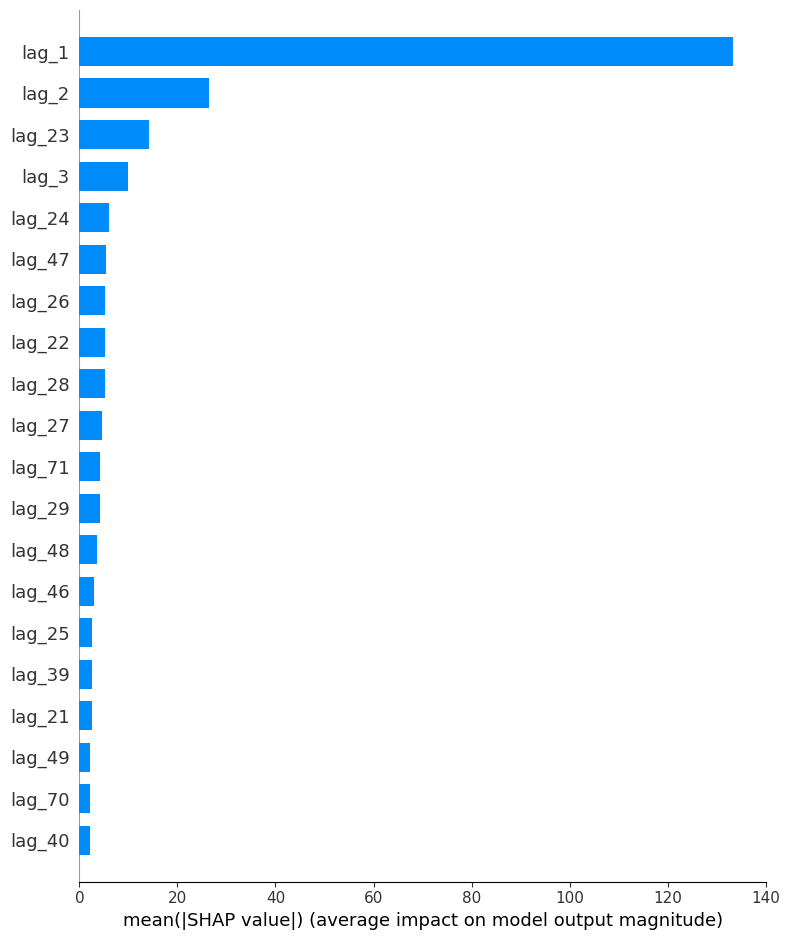

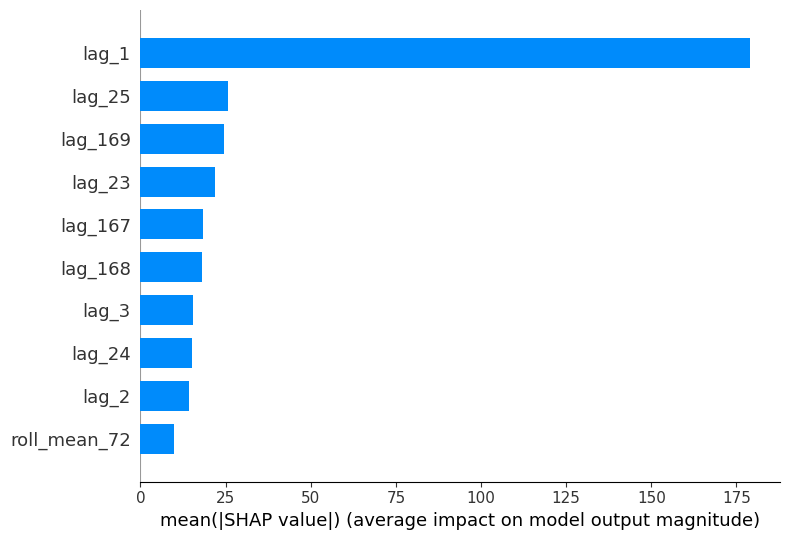

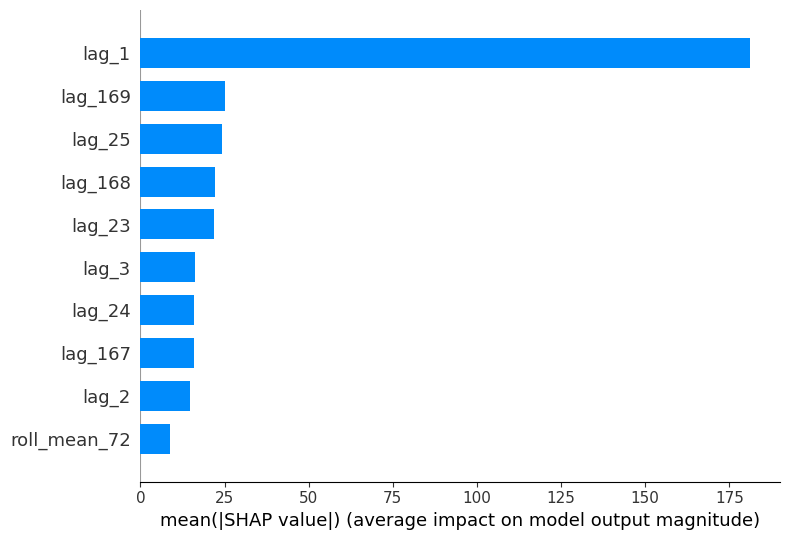

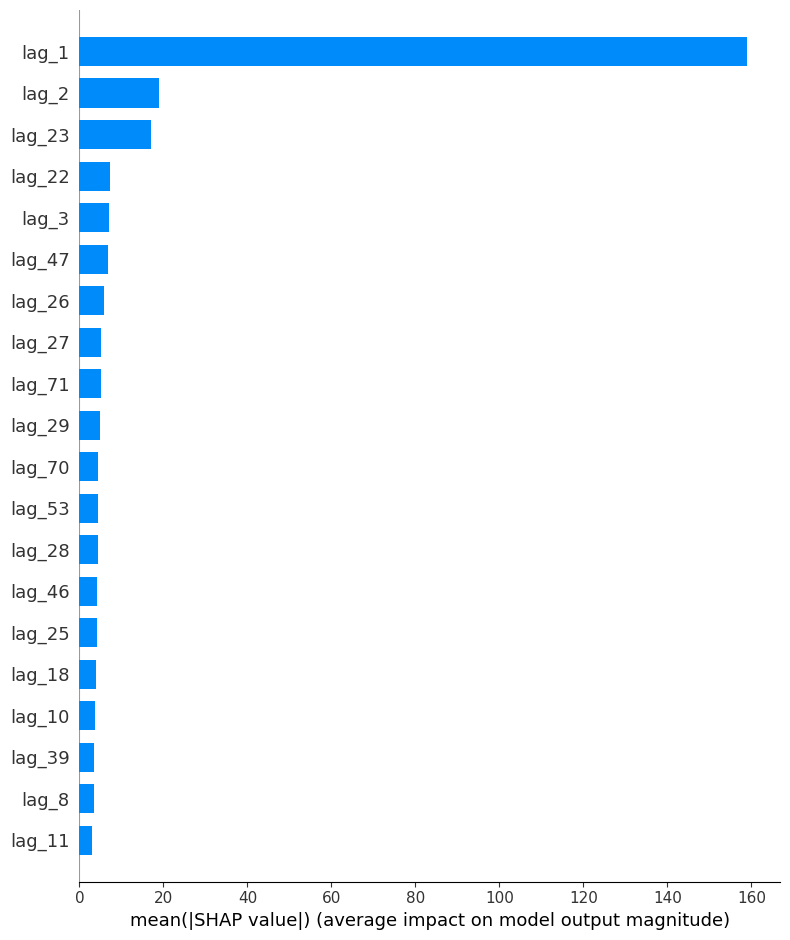

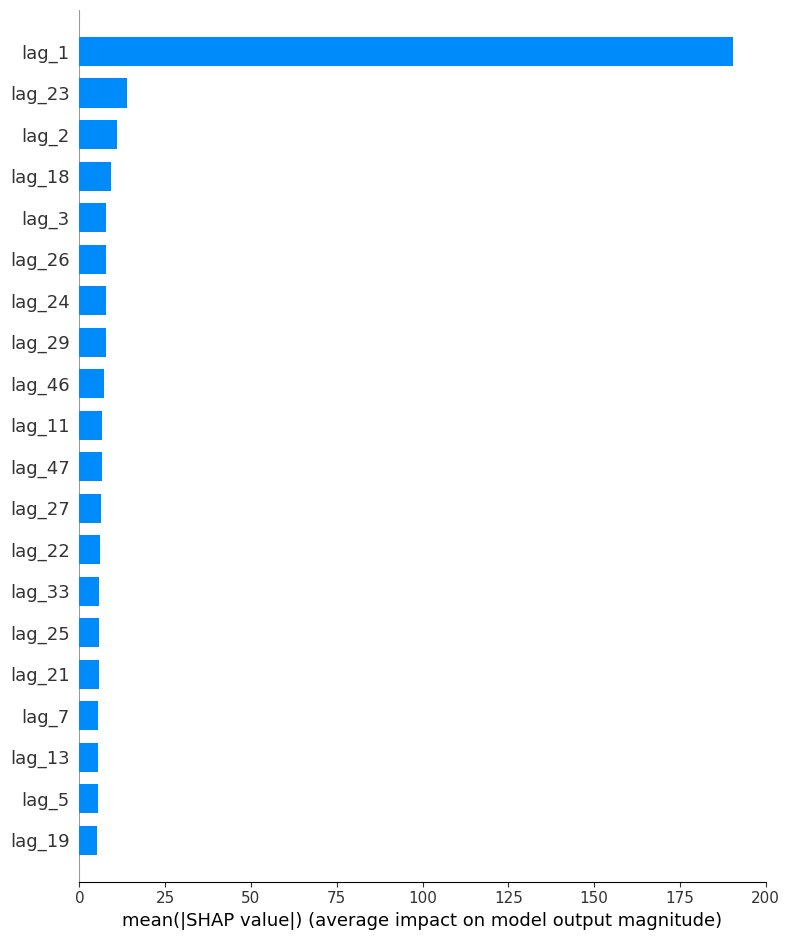

Plotting SHAP summary plot for LGBM


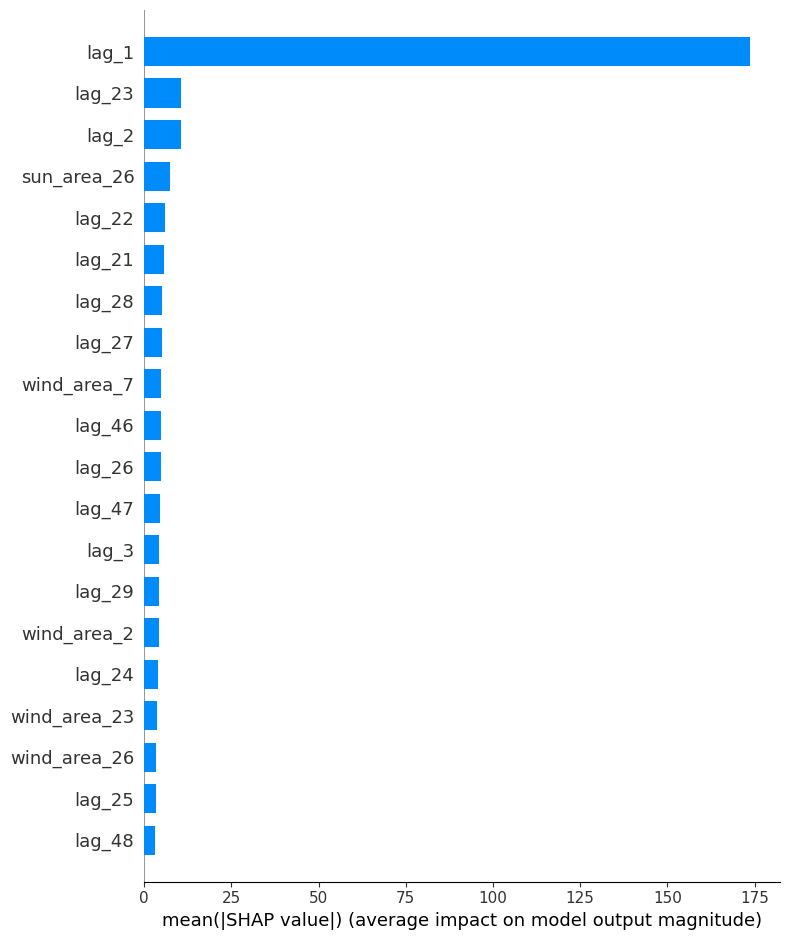

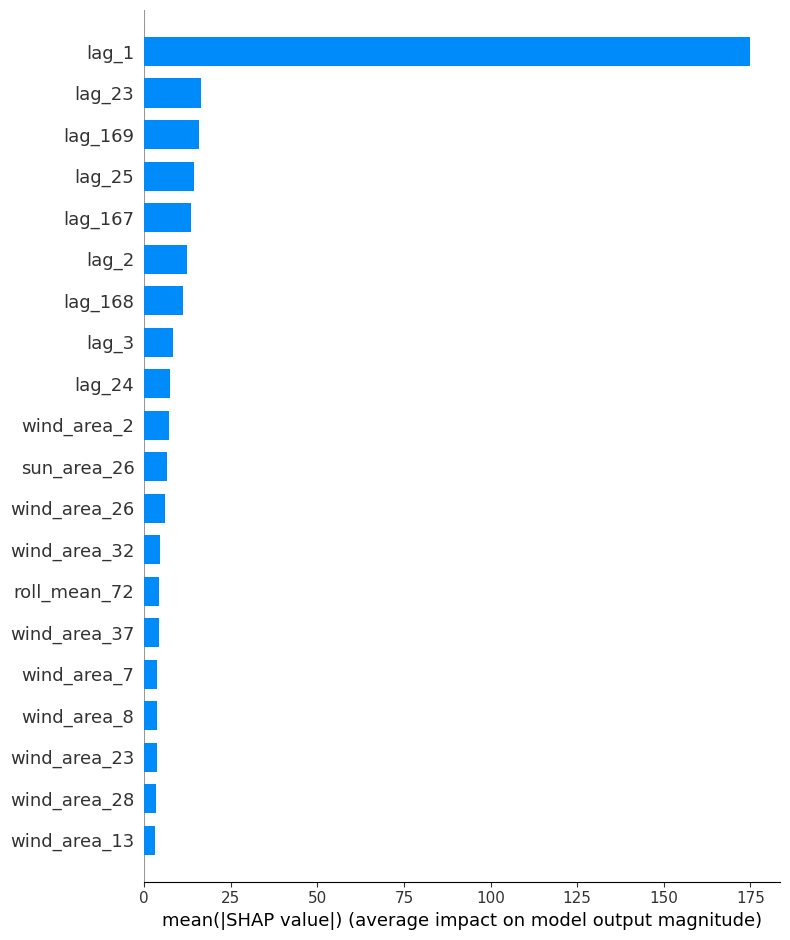

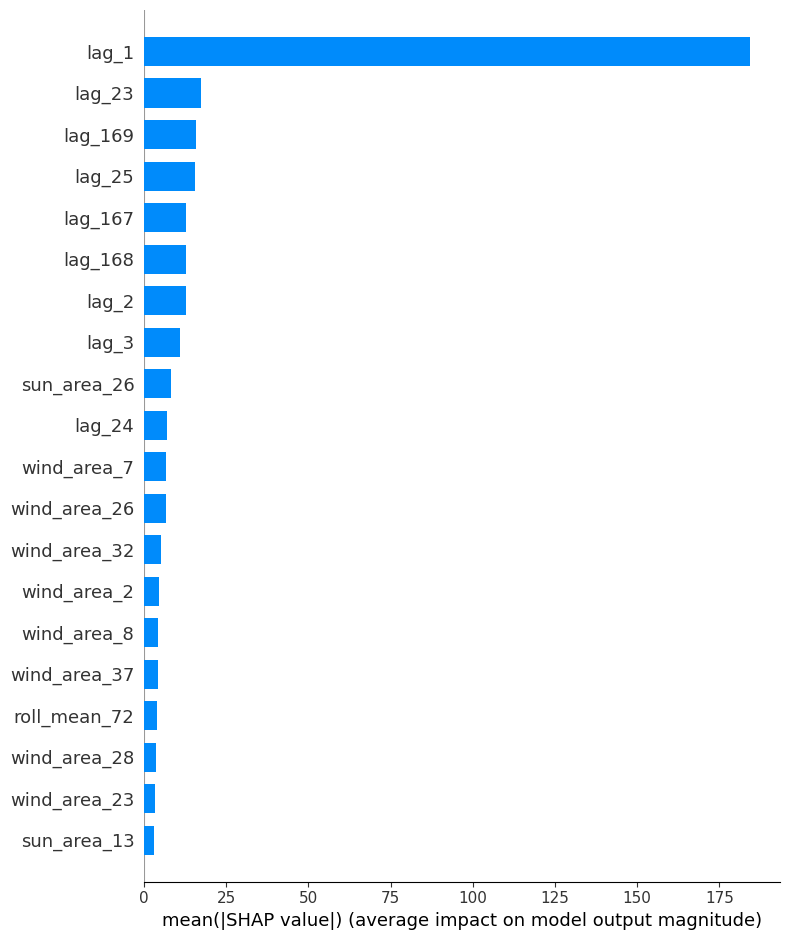

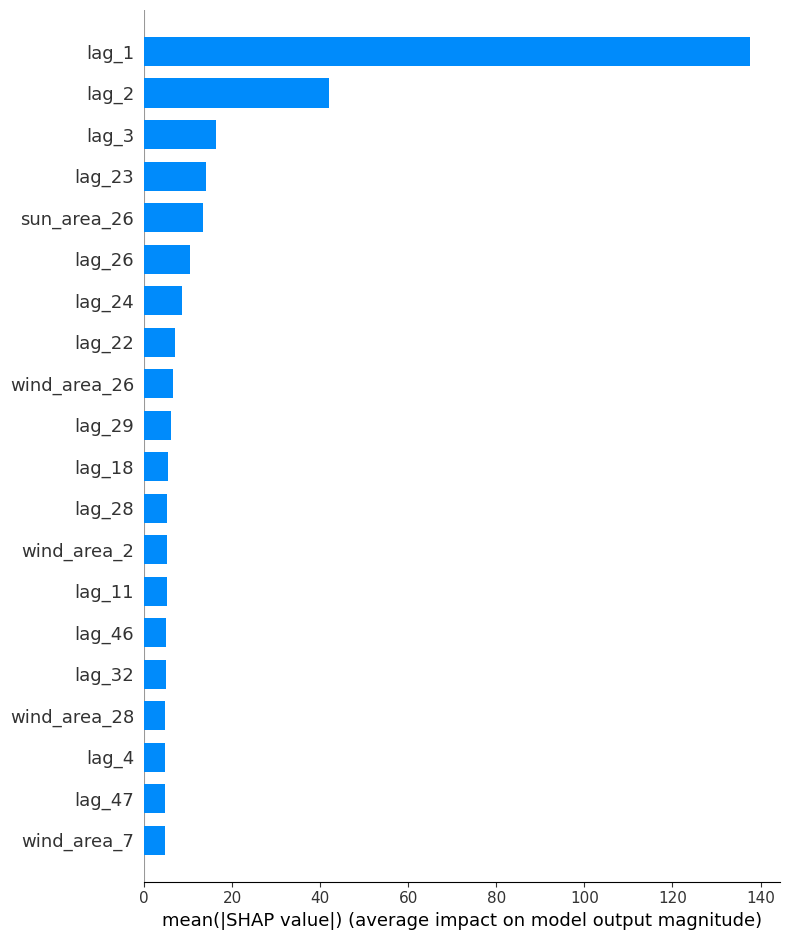

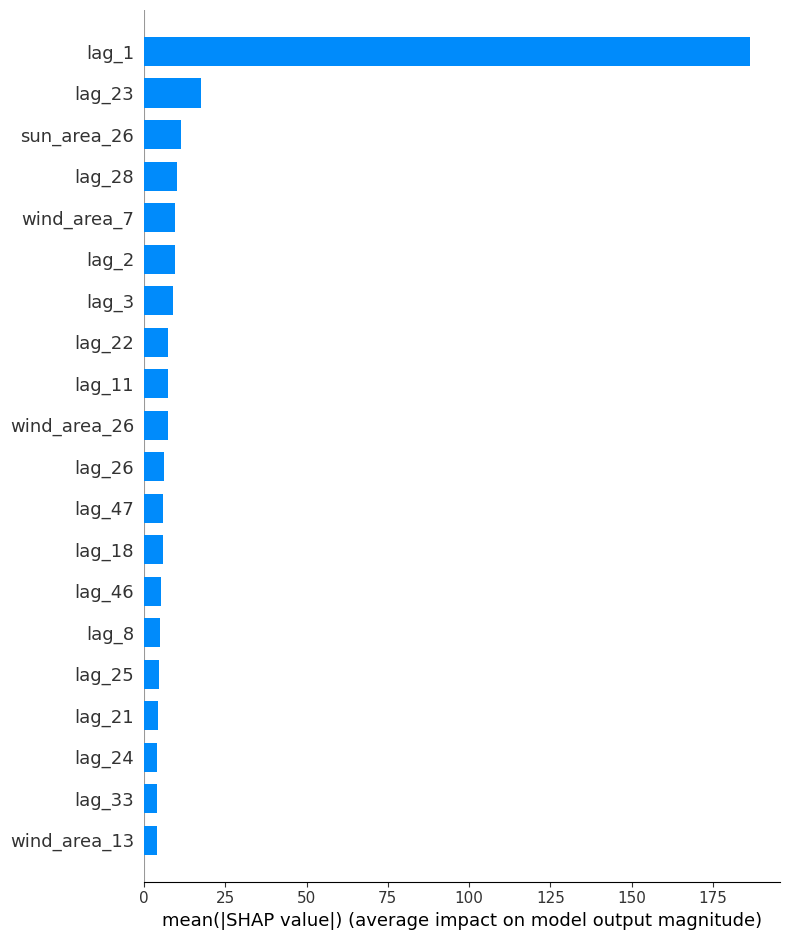

Plotting SHAP summary plot for LGBM


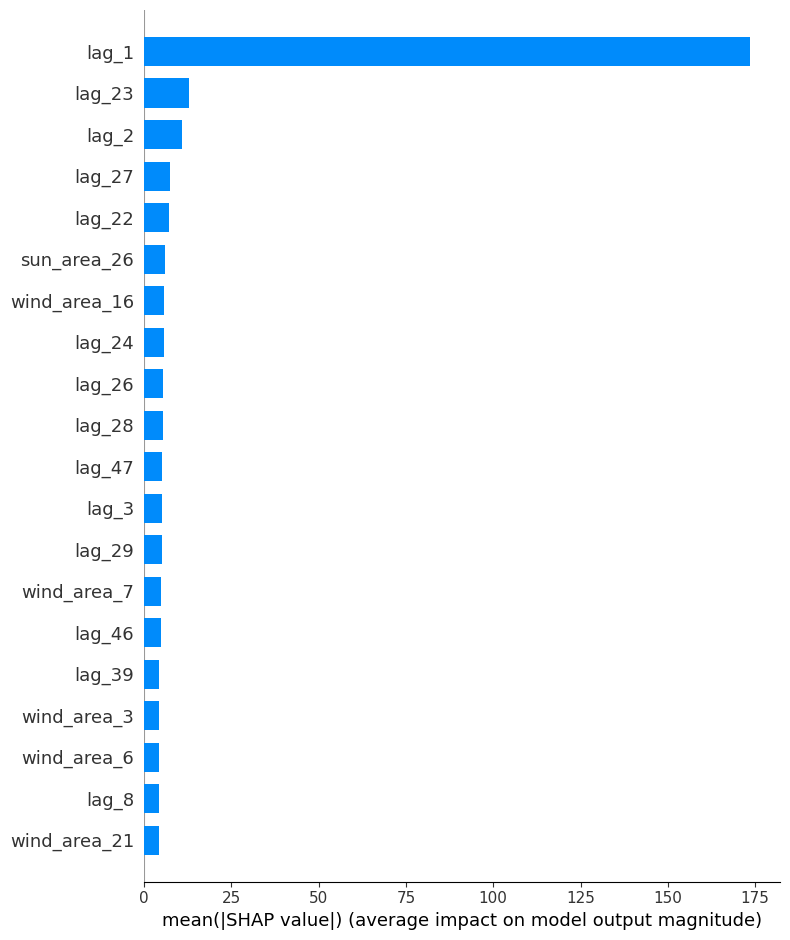

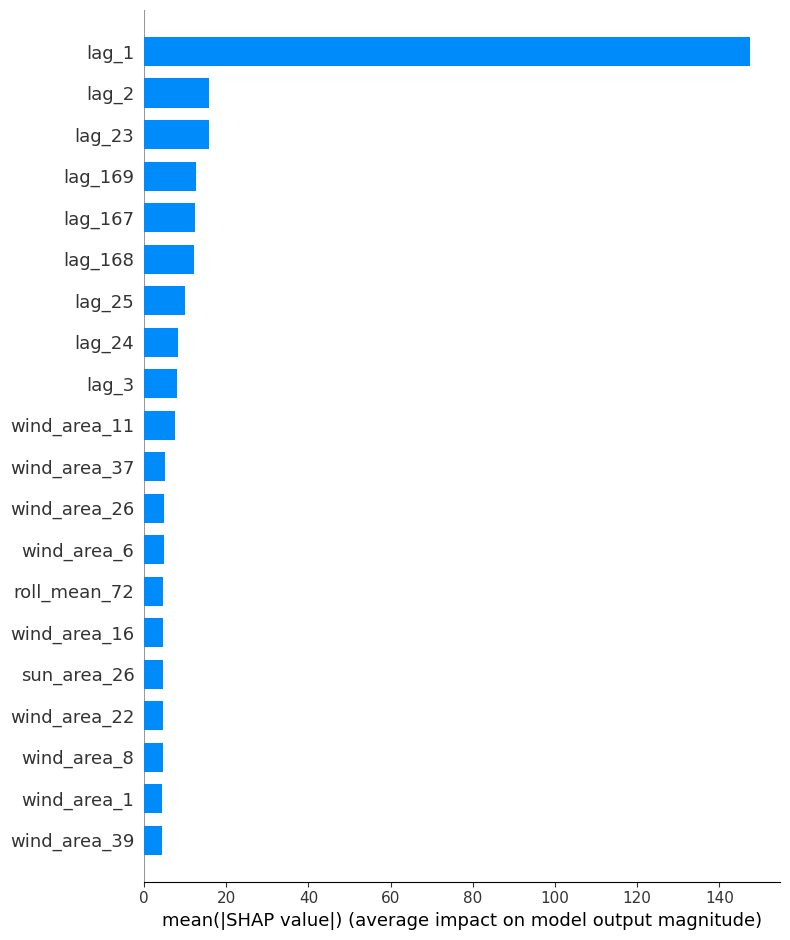

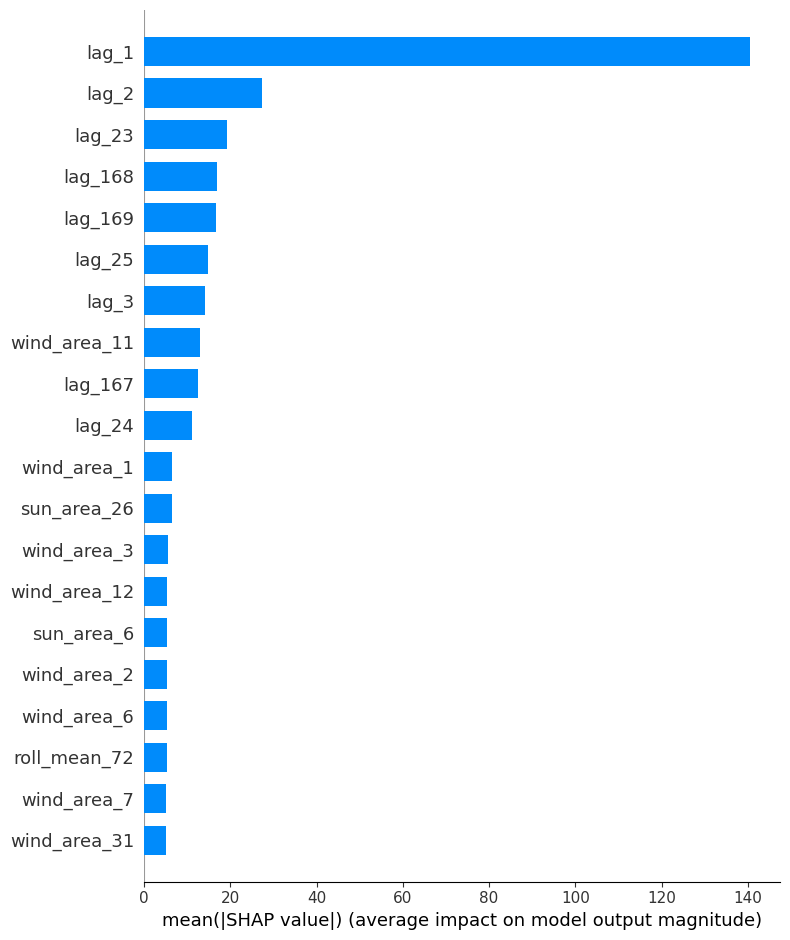

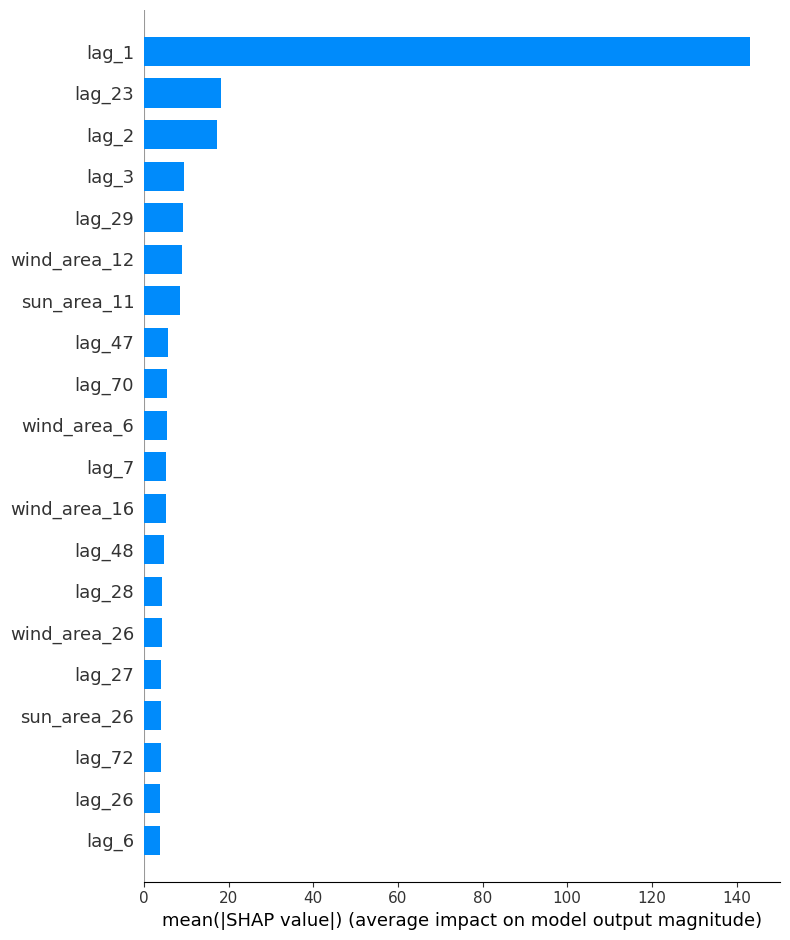

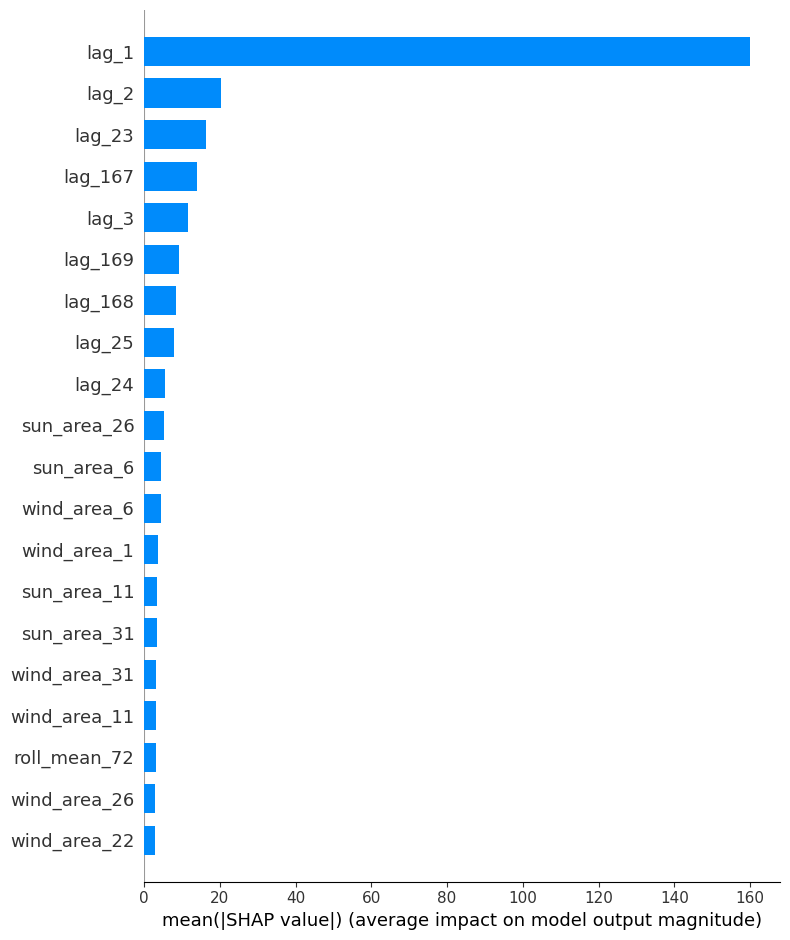

In [6]:
# Get a table of results
results_df_MAE = experiment.summarize_feature_group_results(metric='MAE')
results_df_MSE = experiment.summarize_feature_group_results(metric='RMSE')

print(results_df_MAE)
print(results_df_MSE)

# Plot the results
experiment.plot_feature_group_results(metric='MAE')
experiment.plot_feature_group_results(metric='RMSE')
experiment.plot_feature_group_results(metric='SHAP_values')

In [7]:
#experiment.save_feature_group_results_to_csv("../results/reduction_notemp/experiment_1_results.csv")

# Experiment 2
PCA pure reduction. No custom areas

In [8]:
experiment = EnhancedTimeSeriesExperiment(
    models=models,
    target_column='price',
    forecast_horizon=192,
    n_splits=5,
    step_size=192 # 8 days are skipped between each forecast.
)

In [9]:
data = Dataretreiver(reduce='pca_pure', debug=True)
df = data.combined
#data.save_selected_areas_to_csv("../results/reduction_notemp/experiment_2_areas.csv")


# Run the experiments with these custom combinations
experiment.run_feature_group_experiments(
    df=df,
    add_all_columns=True,
    add_base_columns=False
)

WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:162: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:163: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:172: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:208: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.




Filling missing values
Start date: 2024-01-01 00:00:00
End date: 2024-12-31 23:00:00
Total expected hours: 8784
Hours in original data: 8783
Missing hours filled: 1
Hours in complete data: 8784
Expected hours for the year: 8784


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:208: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:208: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.




Top columns selected: ['sun_area_36', 'sun_area_21', 'sun_area_31', 'sun_area_6', 'sun_area_5', 'sun_area_1', 'sun_area_16', 'sun_area_11', 'sun_area_4', 'sun_area_22']
Total variance explained with the 10 columns: 98.06%
Top columns selected: ['wind_area_5', 'wind_area_36', 'wind_area_31', 'wind_area_15', 'wind_area_29', 'wind_area_40', 'wind_area_1', 'wind_area_20', 'wind_area_2', 'wind_area_25']
Total variance explained with the 10 columns: 96.63%
Top columns selected: ['temp_area_25', 'temp_area_15', 'temp_area_36', 'temp_area_40', 'temp_area_14', 'temp_area_11', 'temp_area_39', 'temp_area_20', 'temp_area_19', 'temp_area_37']
Total variance explained with the 10 columns: 98.95%
Identified area columns: {'sun': {36: 'sun_area_36', 21: 'sun_area_21', 31: 'sun_area_31', 6: 'sun_area_6', 5: 'sun_area_5', 1: 'sun_area_1', 16: 'sun_area_16', 11: 'sun_area_11', 4: 'sun_area_4', 22: 'sun_area_22'}, 'wind': {5: 'wind_area_5', 36: 'wind_area_36', 31: 'wind_area_31', 15: 'wind_area_15', 29: '

Best trial: 6. Best value: 199.695: 100%|██████████| 20/20 [02:01<00:00,  6.09s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72] 
  Parameters: {'n_estimators': 900, 'max_depth': 4, 'min_data_in_leaf': 117, 'learning_rate': 0.2905039091708218, 'feature_fraction': 0.5478562583061936, 'max_bin': 227, 'reg_alpha': 0.6272489720512687, 'reg_lambda': 0.7234163581899548}
  Backtesting metric: 199.69506024352884
Running CV split 2/5 for feature group all_areas


Best trial: 15. Best value: 185.785: 100%|██████████| 20/20 [01:49<00:00,  5.49s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 600, 'max_depth': 5, 'min_data_in_leaf': 105, 'learning_rate': 0.12106754990104161, 'feature_fraction': 0.9291874835747144, 'max_bin': 139, 'reg_alpha': 0.016279994350587745, 'reg_lambda': 0.76060461497565}
  Backtesting metric: 185.78547210251756
Running CV split 3/5 for feature group all_areas


Best trial: 6. Best value: 197.196:  75%|███████▌  | 15/20 [01:32<00:30,  6.15s/it]


[W 2025-05-09 10:21:33,386] Trial 15 failed with parameters: {'n_estimators': 700, 'max_depth': 9, 'min_data_in_leaf': 98, 'learning_rate': 0.0756287100793821, 'feature_fraction': 0.5083769107209427, 'max_bin': 232, 'reg_alpha': 0.24378582633422896, 'reg_lambda': 0.3738864455985641, 'lags': 72} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/sedroc/Bachelor/FEPCEU/.venv/lib/python3.13/site-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "/home/sedroc/Bachelor/FEPCEU/.venv/lib/python3.13/site-packages/skforecast/model_selection/_search.py", line 772, in _objective
    metrics, _ = backtesting_forecaster(
                 ~~~~~~~~~~~~~~~~~~~~~~^
                     forecaster    = forecaster,
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<6 lines>...
                     show_progress = False
                     ^^^^^^^^^^^^^^^^^^^^^
                 )
                 

KeyboardInterrupt: 

In [ ]:
# Get a table of results
results_df_MAE = experiment.summarize_feature_group_results(metric='MAE')
results_df_MSE = experiment.summarize_feature_group_results(metric='RMSE')

print(results_df_MAE)
print(results_df_MSE)

# Plot the results
experiment.plot_feature_group_results(metric='MAE')
experiment.plot_feature_group_results(metric='RMSE')
experiment.plot_feature_group_results(metric='SHAP_values')

                      BASELINE                LGBM               ARIMA  \
all_areas  259.3271 ± 126.1766  161.7370 ± 32.0103  165.5935 ± 39.1637   

                 NEURALPROPHET  
all_areas  246.8271 ± 180.0591  
                      BASELINE                LGBM               ARIMA  \
all_areas  320.7175 ± 138.3372  207.0207 ± 42.6620  206.5222 ± 46.9689   

                 NEURALPROPHET  
all_areas  246.8271 ± 180.0591  


In [ ]:
#experiment.save_feature_group_results_to_csv("../results/reduction_notemp/experiment_2_results.csv")

Saved feature group results to ../results/reduction_notemp/experiment_2_results_20250506_135829.csv


# Experiment 3
PCA KMeans reduction. No custom areas

In [10]:
experiment = EnhancedTimeSeriesExperiment(
    models=models,
    target_column='price',
    forecast_horizon=192,
    n_splits=5,
    step_size=192 # 8 days are skipped between each forecast.
)

WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:162: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:163: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:172: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:208: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:208: FutureWarning:

'H' is deprecated and will be removed in a future version, ple

Filling missing values
Start date: 2024-01-01 00:00:00
End date: 2024-12-31 23:00:00
Total expected hours: 8784
Hours in original data: 8783
Missing hours filled: 1
Hours in complete data: 8784
Expected hours for the year: 8784


WARNING - (py.warnings._showwarnmsg) - /home/sedroc/Bachelor/FEPCEU/data/data_retriever.py:208: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.




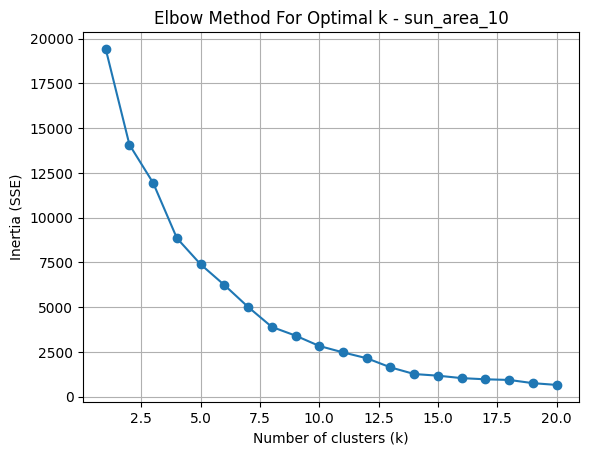

PCA explained variance ratio: 75.19% total variance retained

Selected representative wind points:
['sun_area_23', 'sun_area_8', 'sun_area_39', 'sun_area_9', 'sun_area_21', 'sun_area_31', 'sun_area_30', 'sun_area_33', 'sun_area_6', 'sun_area_19']


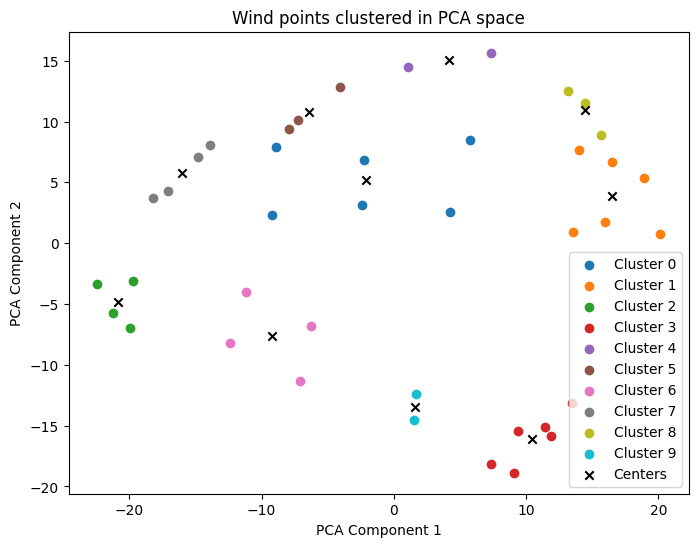

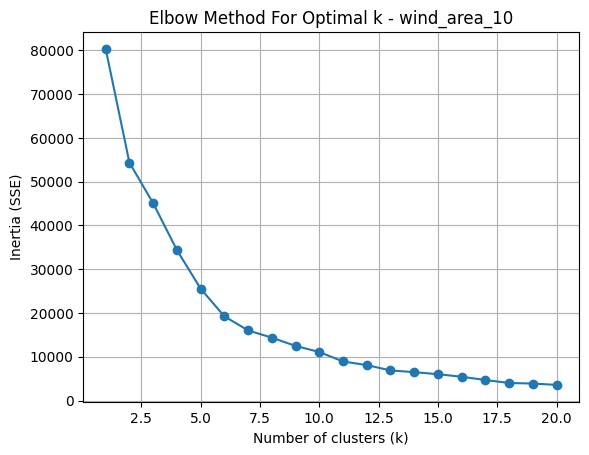

PCA explained variance ratio: 88.35% total variance retained

Selected representative wind points:
['wind_area_22', 'wind_area_34', 'wind_area_7', 'wind_area_10', 'wind_area_16', 'wind_area_32', 'wind_area_24', 'wind_area_31', 'wind_area_1', 'wind_area_4']


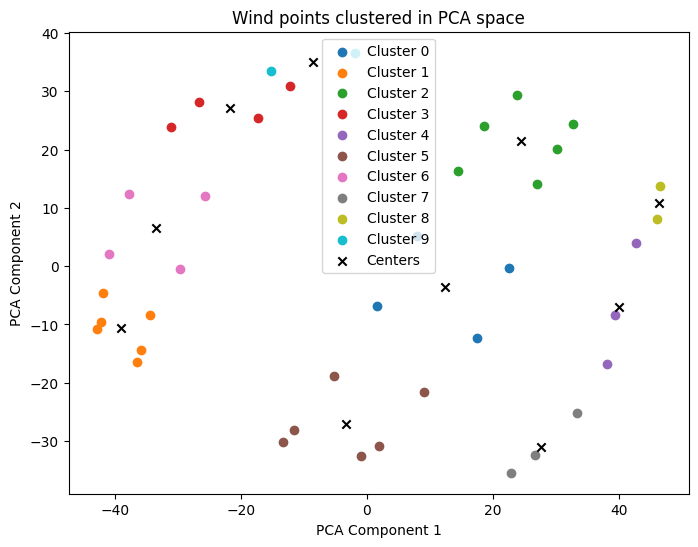

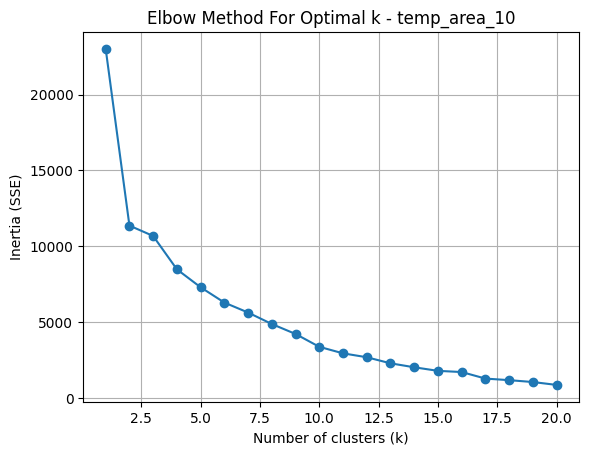

PCA explained variance ratio: 87.12% total variance retained

Selected representative wind points:
['temp_area_22', 'temp_area_2', 'temp_area_26', 'temp_area_40', 'temp_area_15', 'temp_area_28', 'temp_area_24', 'temp_area_37', 'temp_area_5', 'temp_area_36']


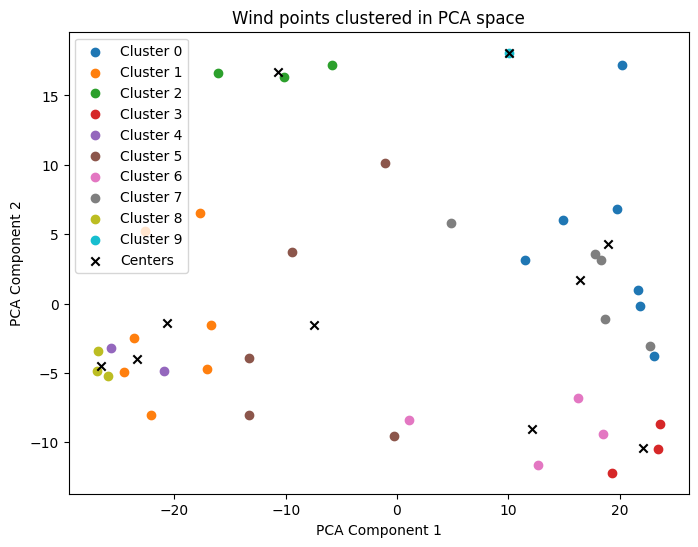

Identified area columns: {'sun': {23: 'sun_area_23', 8: 'sun_area_8', 39: 'sun_area_39', 9: 'sun_area_9', 21: 'sun_area_21', 31: 'sun_area_31', 30: 'sun_area_30', 33: 'sun_area_33', 6: 'sun_area_6', 19: 'sun_area_19'}, 'wind': {22: 'wind_area_22', 34: 'wind_area_34', 7: 'wind_area_7', 10: 'wind_area_10', 16: 'wind_area_16', 32: 'wind_area_32', 24: 'wind_area_24', 31: 'wind_area_31', 1: 'wind_area_1', 4: 'wind_area_4'}}
Cross-validation splits with sliding window:
Split 1: Train start = 2024-01-01 00:00:00 (index 0), Train end = 2024-06-29 20:00:00 (index 4340), Test end = 2024-07-07 19:00:00 (index 4531), Training size = 4340
Split 2: Train start = 2024-01-09 00:00:00 (index 192), Train end = 2024-07-07 20:00:00 (index 4532), Test end = 2024-07-15 19:00:00 (index 4723), Training size = 4340
Split 3: Train start = 2024-01-17 00:00:00 (index 384), Train end = 2024-07-15 20:00:00 (index 4724), Test end = 2024-07-23 19:00:00 (index 4915), Training size = 4340
Split 4: Train start = 2024-01

Best trial: 12. Best value: 209.355: 100%|██████████| 20/20 [01:57<00:00,  5.87s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 1000, 'max_depth': 3, 'min_data_in_leaf': 25, 'learning_rate': 0.32660545054129364, 'feature_fraction': 0.97233217839372, 'max_bin': 249, 'reg_alpha': 0.003677635938920898, 'reg_lambda': 0.2806312734469436}
  Backtesting metric: 209.35472865952735
Running CV split 2/5 for feature group all_areas


Best trial: 3. Best value: 203.177: 100%|██████████| 20/20 [01:50<00:00,  5.51s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 700, 'max_depth': 9, 'min_data_in_leaf': 425, 'learning_rate': 0.36828461979295724, 'feature_fraction': 0.6497975335887826, 'max_bin': 76, 'reg_alpha': 0.49601196039500156, 'reg_lambda': 0.12437866286387411}
  Backtesting metric: 203.17737463971764
Running CV split 3/5 for feature group all_areas


Best trial: 17. Best value: 194.122: 100%|██████████| 20/20 [01:56<00:00,  5.82s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72] 
  Parameters: {'n_estimators': 700, 'max_depth': 4, 'min_data_in_leaf': 92, 'learning_rate': 0.29106128771236484, 'feature_fraction': 0.9271816216524584, 'max_bin': 224, 'reg_alpha': 0.8755840478639849, 'reg_lambda': 0.7921133079755664}
  Backtesting metric: 194.12196332296216
Running CV split 4/5 for feature group all_areas


Best trial: 12. Best value: 191.781: 100%|██████████| 20/20 [02:05<00:00,  6.27s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 1000, 'max_depth': 9, 'min_data_in_leaf': 26, 'learning_rate': 0.08669272097448963, 'feature_fraction': 0.5977982191533258, 'max_bin': 64, 'reg_alpha': 0.2922174014539369, 'reg_lambda': 0.42419466168949144}
  Backtesting metric: 191.7814026532239
Running CV split 5/5 for feature group all_areas


Best trial: 12. Best value: 186.398: 100%|██████████| 20/20 [02:06<00:00,  6.32s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48] 
  Parameters: {'n_estimators': 700, 'max_depth': 3, 'min_data_in_leaf': 25, 'learning_rate': 0.3260203445997481, 'feature_fraction': 0.8594596364484144, 'max_bin': 132, 'reg_alpha': 0.9983199059764084, 'reg_lambda': 0.3212125756438966}
  Backtesting metric: 186.3981297252744


In [11]:
data = Dataretreiver(reduce='pca_kmeans', debug=True)
df = data.combined
#data.save_selected_areas_to_csv("../results/reduction_notemp/experiment_3_areas.csv")

# Run the experiments with these custom combinations
experiment.run_feature_group_experiments(
    df=df,
    add_all_columns=True,
    add_base_columns=False
)

                         LGBM
all_areas  167.5270 ± 33.3843
                         LGBM
all_areas  214.4107 ± 41.8872


Plotting SHAP summary plot for LGBM


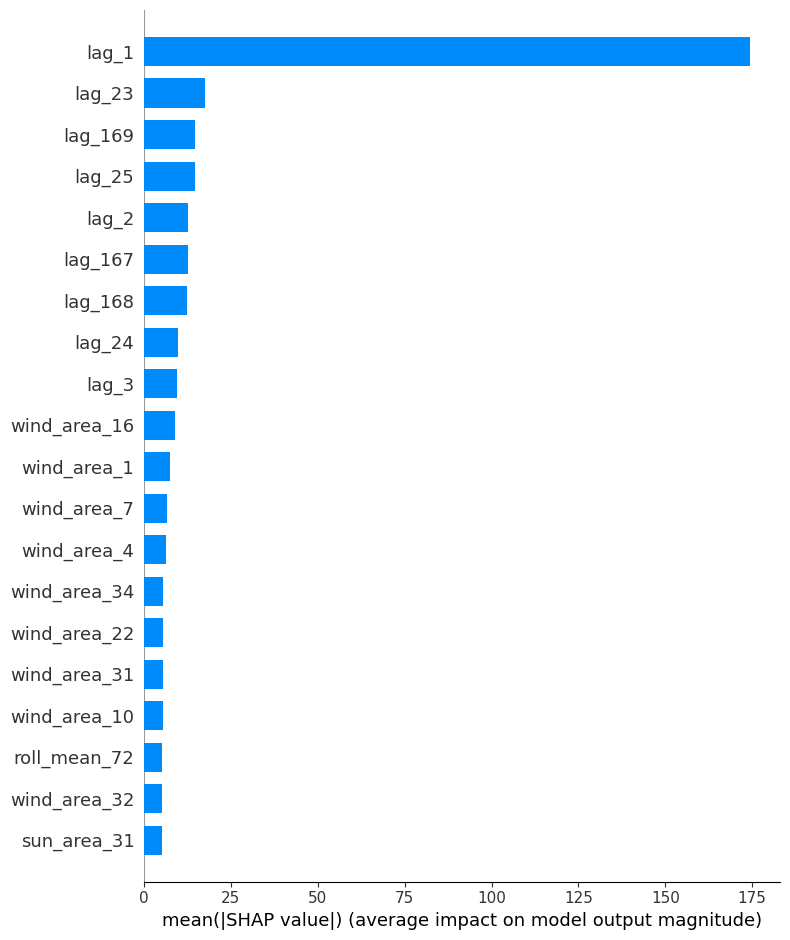

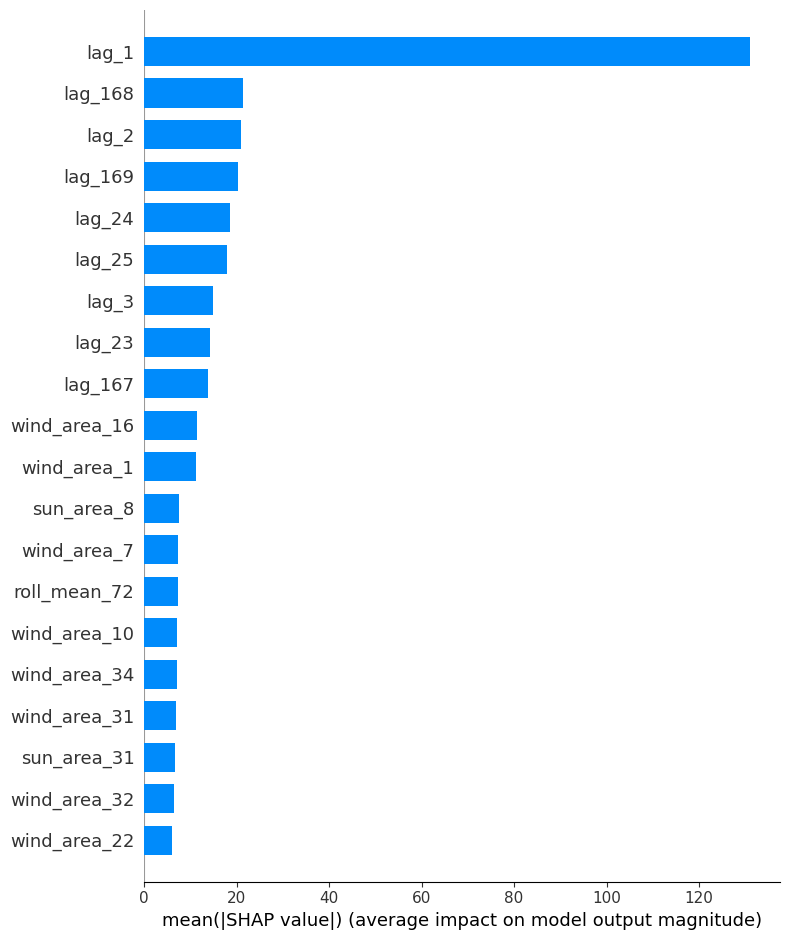

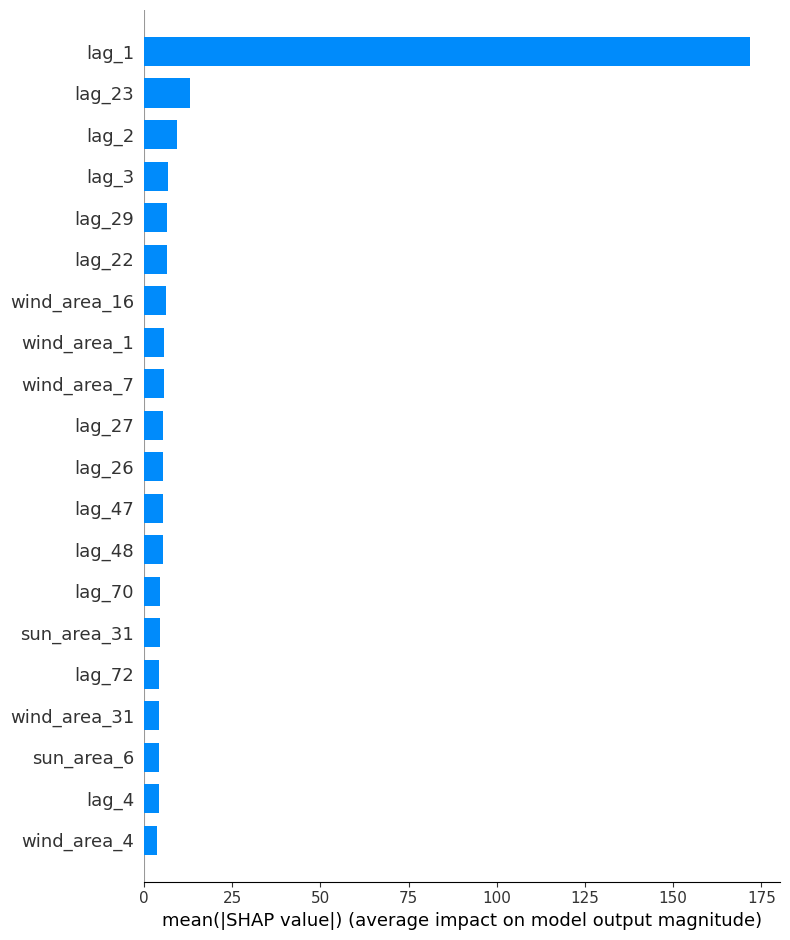

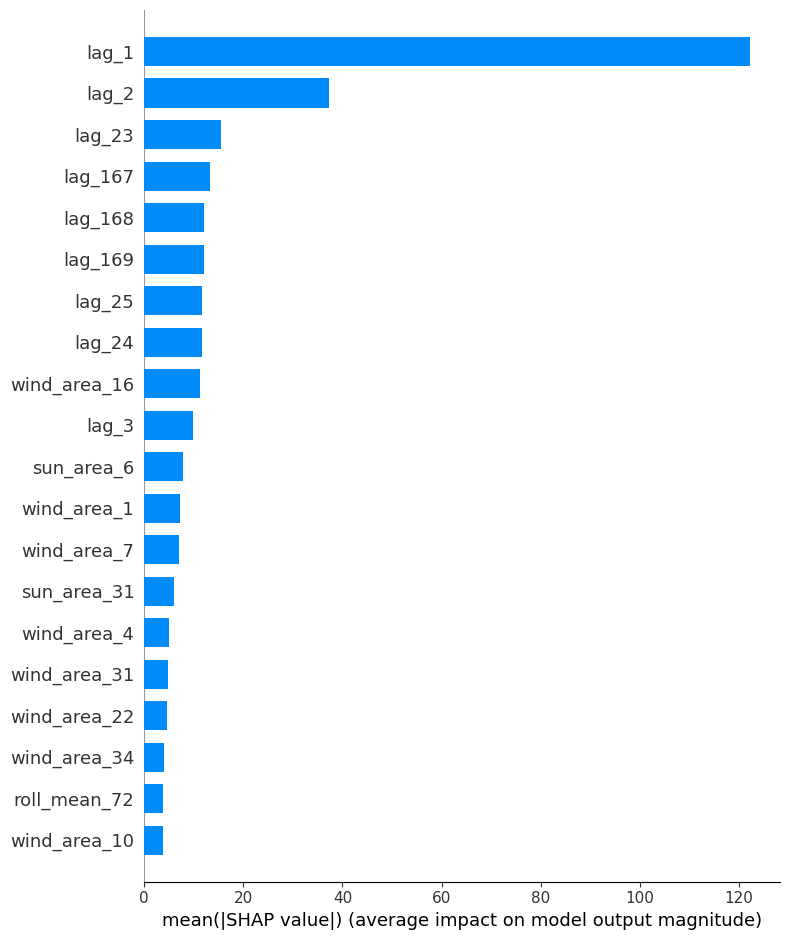

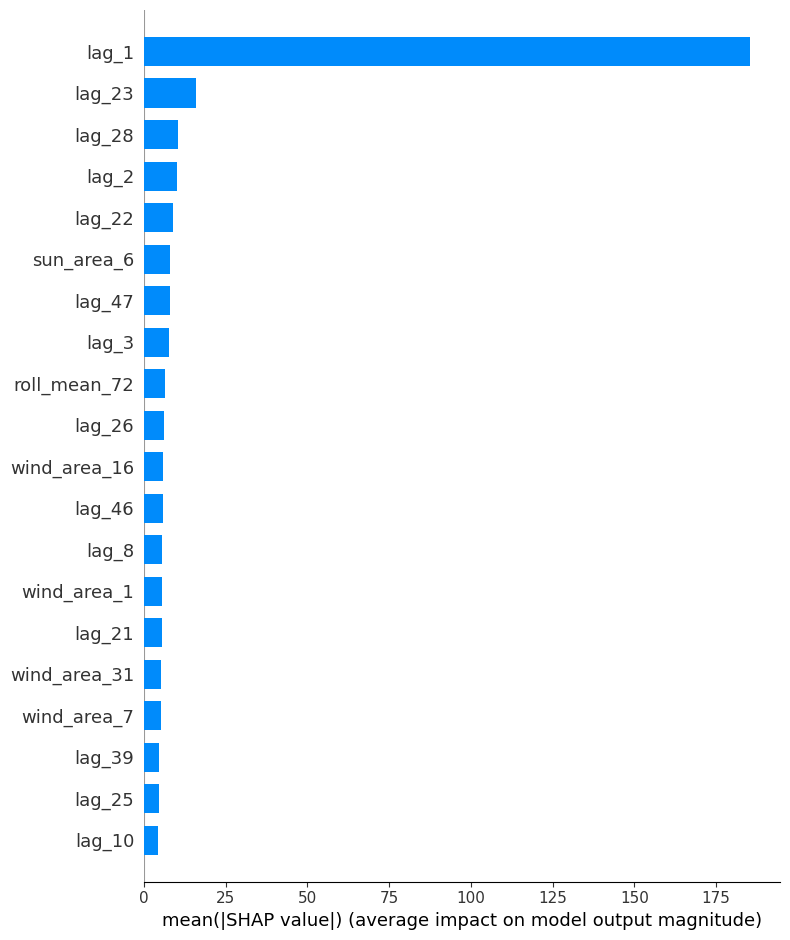

In [12]:
# Get a table of results
results_df_MAE = experiment.summarize_feature_group_results(metric='MAE')
results_df_MSE = experiment.summarize_feature_group_results(metric='RMSE')

print(results_df_MAE)
print(results_df_MSE)

# Plot the results
experiment.plot_feature_group_results(metric='MAE')
experiment.plot_feature_group_results(metric='RMSE')
experiment.plot_feature_group_results(metric='SHAP_values')

In [ ]:
# Plot predictions for the 'sun_areas_1_2_3' feature group
experiment.plot_feature_group_predictions(
    df=df,
    feature_group='all_areas',
    fold_index=0  # First CV fold
)

In [ ]:
#experiment.save_feature_group_results_to_csv("../results/reduction_notemp/experiment_3_results.csv")

Saved feature group results to ../results/reduction_notemp/experiment_3_results_20250506_142027.csv


# Experiment 4
Pearson reduction

In [ ]:
experiment = EnhancedTimeSeriesExperiment(
    models=models,
    target_column='price',
    forecast_horizon=192,
    n_splits=5,
    step_size=192 # 8 days are skipped between each forecast.
)

In [ ]:
data = Dataretreiver(reduce='pearson', debug=True)
df = data.combined
#data.save_selected_areas_to_csv("../results/reduction_notemp/experiment_4_areas.csv")


# Run the experiments with these custom combinations
experiment.run_feature_group_experiments(
    df=df,
    add_all_columns=True,
    add_base_columns=False
)

WARNING - (py.warnings._showwarnmsg) - C:\Users/au723200/FEPCEU\data\data_retriever.py:155: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - C:\Users/au723200/FEPCEU\data\data_retriever.py:156: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


WARNING - (py.warnings._showwarnmsg) - C:\Users/au723200/FEPCEU\data\data_retriever.py:165: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - C:\Users/au723200/FEPCEU\data\data_retriever.py:198: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.


WARNING - (py.warnings._showwarnmsg) - C:\Users/au723200/FEPCEU\data\data_retriever.py:198: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

Filling missing values
Start date: 2024-01-01 00:00:00
End date: 2024-12-31 23:00:00
Total expected hours: 8784
Hours in original data: 8783
Missing hours filled: 1
Hours in complete data: 8784
Expected hours for the year: 8784
Top 10 most correlated with elspot price:
sun_area_6: correlation = -0.2910
sun_area_11: correlation = -0.2882
sun_area_1: correlation = -0.2874
sun_area_16: correlation = -0.2839
sun_area_7: correlation = -0.2830
sun_area_2: correlation = -0.2830
sun_area_3: correlation = -0.2828
sun_area_21: correlation = -0.2828
sun_area_8: correlation = -0.2814
sun_area_26: correlation = -0.2802
Top 10 most correlated with elspot price:
wind_area_12: correlation = -0.4016
wind_area_13: correlation = -0.3981
wind_area_17: correlation = -0.3916
wind_area_16: correlation = -0.3907
wind_area_18: correlation = -0.3902
wind_area_27: correlation = -0.3849
wind_area_7: correlation = -0.3843
wind_area_11: correlation = -0.3812
wind_area_6: correlation = -0.3740
wind_area_22: correlat

  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 800, 'max_depth': 3, 'min_data_in_leaf': 36, 'learning_rate': 0.3143620826780451, 'feature_fraction': 0.9914051578268095, 'max_bin': 250, 'reg_alpha': 0.07105799362654615, 'reg_lambda': 0.35263538940871203}
  Backtesting metric: 196.57365149779622
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.




Running CV split 2/5 for feature group all_areas


  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 700, 'max_depth': 9, 'min_data_in_leaf': 425, 'learning_rate': 0.3682846197929571, 'feature_fraction': 0.6497975335887827, 'max_bin': 76, 'reg_alpha': 0.49601196039500156, 'reg_lambda': 0.12437866286387433}
  Backtesting metric: 203.17737463971764
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.




Running CV split 3/5 for feature group all_areas


  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 900, 'max_depth': 5, 'min_data_in_leaf': 115, 'learning_rate': 0.24367468230734868, 'feature_fraction': 0.824587787797168, 'max_bin': 236, 'reg_alpha': 0.2653084289324298, 'reg_lambda': 0.011346512468275893}
  Backtesting metric: 179.22975598275679
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.




Running CV split 4/5 for feature group all_areas


  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [  1   2   3  23  24  25 167 168 169] 
  Parameters: {'n_estimators': 700, 'max_depth': 5, 'min_data_in_leaf': 77, 'learning_rate': 0.39054294378818616, 'feature_fraction': 0.91868582403777, 'max_bin': 136, 'reg_alpha': 0.38777064094205205, 'reg_lambda': 0.23616907749331872}
  Backtesting metric: 194.18204646564902
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.




Running CV split 5/5 for feature group all_areas


  0%|          | 0/20 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48] 
  Parameters: {'n_estimators': 300, 'max_depth': 8, 'min_data_in_leaf': 90, 'learning_rate': 0.37773717317688404, 'feature_fraction': 0.9359480059310723, 'max_bin': 50, 'reg_alpha': 0.31377926323982896, 'reg_lambda': 0.14139284574514538}
  Backtesting metric: 188.515749622642
Fitting ARIMA model with order: [1, 0, 1] and seasonal order: [1, 1, 1, 24]


WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals




Model fitted successfully.
Forecasting with ARIMA model...
Forecasting completed.


Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 68it [00:00, ?it/s]

WARNING - (py.warnings._showwarnmsg) - c:\Users\au723200\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning:

R^2 score is not well-defined with less than two samples.




In [ ]:
# Get a table of results
results_df_MAE = experiment.summarize_feature_group_results(metric='MAE')
results_df_MSE = experiment.summarize_feature_group_results(metric='RMSE')

print(results_df_MAE)
print(results_df_MSE)

# Plot the results
experiment.plot_feature_group_results(metric='MAE')
experiment.plot_feature_group_results(metric='RMSE')
experiment.plot_feature_group_results(metric='SHAP_values')

                      BASELINE                LGBM               ARIMA  \
all_areas  259.3271 ± 126.1766  177.4736 ± 31.3329  159.9787 ± 40.5705   

                 NEURALPROPHET  
all_areas  254.2341 ± 179.7522  
                      BASELINE                LGBM               ARIMA  \
all_areas  320.7175 ± 138.3372  224.2323 ± 39.4980  200.3210 ± 47.5422   

                 NEURALPROPHET  
all_areas  254.2341 ± 179.7522  


In [ ]:
#experiment.save_feature_group_results_to_csv("../results/reduction_notemp/experiment_4_results.csv")

Saved feature group results to ../results/reduction_notemp/experiment_4_results_20250506_144248.csv


In [ ]:
# Plot predictions for the 'sun_areas_1_2_3' feature group
experiment.plot_feature_group_predictions(
    df=df,
    feature_group='all_areas',
    fold_index=0  # First CV fold
)